# [ARIMA (AutoRegressive Integrated Moving Average)](https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting#2.-Introduction-to-ARIMA-Models-)

# 1. Introduction to Time Series Forecasting
A **Time Series** is defined as a series of data points recorded at different time intervals. The time order can be daily, monthly, or even yearly.

Forecasting a time series can be broadly divided into two types.
1. **Univariate Time Series Forecasting**: only use the previous values to predict.
2. **Multi Variate Time Series Forecasting** predictors with other variables instead of the previous of itself.

# 2. Introduction to ARIMA Models
ARIMA models are designed to forecast future values of a target variable based on its own past values
## 2.1 How it works?

1. **AR(p) Autoregression**: The autoregressive component refers to the linear dependency between an observation and a certain number of lagged observations (previous time steps). In an ARIMA model, the current value of the time series is modeled as a linear combination of its past values. The order of autoregression (denoted as `p`) determines how many lagged observations are included in the model.
1. **I(d) Integrated**: The integrated component indicates differencing, which is a technique used to make the time series data stationary. Stationarity implies that the statistical properties of the series, such as mean and variance, do not change over time. Differencing involves subtracting each observation from its previous observation. The order of differencing (denoted as `d`) specifies how many times differencing is performed to achieve stationarity.
1. **MA(q) Moving Average**: The moving average component represents the dependency between an observation and a residual error from a moving average model applied to lagged observations. It captures short-term, random fluctuations in the data. The order of the moving average (denoted as `q`) determines how many past error terms are included in the model.

## 2.2 Types of ARIMA Model
* **ARIMA** : Non-seasonal Autoregressive Integrated Moving Averages
* **SARIMA** : Seasonal ARIMA
* **SARIMAX** : Seasonal ARIMA with exogenous variables

# 3. The meaning of p, d and q in ARIMA model
# 3.1 The meaning of p
* `p` is the order of the Auto Regressive (AR) term. It refers to the number of lags of Y to be used as predictors.

## 3.2 The meaning of d
* The term `Auto Regressive` in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as we know, work best when the predictors are not correlated and are independent of each other. So we need to make the time series `stationary`.
* The most common approach to make the series stationary is to `difference` it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.
* The value of `d`, therefore, is the minimum number of differencing needed to make the series stationary. If the time series is already stationary, then d = 0.

## 3.3 The meaning of q
* q is the order of the **Moving Average (MA)** term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

# 4. AR and MA models 
## 4.1 AR model

An **Auto Regressive (AR)** model is one where Yt depends only on its own lags.
Yt is a function of the `lags of Yt`. It is depicted by the following equation:

![lag of yt](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png?ezimgfmt=ng:webp/ngcb1)

where,
* $Y_{t-1}$ is the lag1 of the series
* 𝛽1  is the coefficient of lag1 that the model estimates
* 𝛼  is the intercept term, also estimated by the model

## 4.2 MA model
A **Moving Average (MA) model** is one where Yt depends only on the lagged forecast errors. It is depicted by the following equation -

![ma](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png?ezimgfmt=ng:webp/ngcb1)

where the error terms are the errors of the autoregressive models of the respective lags.

The errors $E_t$ and $E_{t-1}$ are the errors from the following equations :

![error equation](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-3-min.png?ezimgfmt=ng:webp/ngcb1)

## 4.3 ARIMA model
An ARIMA model is one where the time series was differenced at least once to make it stationary and we combine the AR and the MA terms. So the equation of an ARIMA model becomes :
![arima model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min-865x77.png?ezimgfmt=ng:webp/ngcb1)

**ARIMA model in words:**

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

# 5. How to find the order of differencing (d) in ARIMA model

The order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the **ACF(Augmented Dickey Fuller) plot** reaches to zero fairly quick.

From the ACF pot in [Complete Guide to Time Series Analysis](http://localhost:8889/lab/tree/Documents/project/learn_ai/notebooks/time_series/Complete%20Guide%20on%20Time%20Series.ipynb#15.-Test-for-seasonality-of-a-time-series), lag 40 makes he ARIMA model near-stationary.

* If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing.
* If the lag 1 autocorrelation itself is too negative, then the series is probably **over-differenced**.

## 5.1 Routine set up

In [1]:
# list files that available for testing
import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/weely_seasonal_indicator.csv
./data/flu-trends.csv
./data/AirPassengers.csv
./data/reserve.csv
./data/elecdemand.csv
./data/us-retail-sales.csv
./data/dataset.txt
./data/trig.csv
./data/book_sales.csv
./data/tunnel.csv
./data/co2.csv
./data/ar.csv
./data/avocados.csv
./data/.ipynb_checkpoints/reserve-checkpoint.csv
./data/.ipynb_checkpoints/weely_seasonal_indicator-checkpoint.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = './data/dataset.txt'

df = pd.read_csv(path)

df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


Let's check our data:

In [4]:
from statsmodels.tsa.stattools import adfuller
from numpy import log


result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.145186
p-value: 1.000000


> Since p-value(1.00) is greater than the significance level(0.05), let’s difference the series and see how the autocorrelation plot looks like.

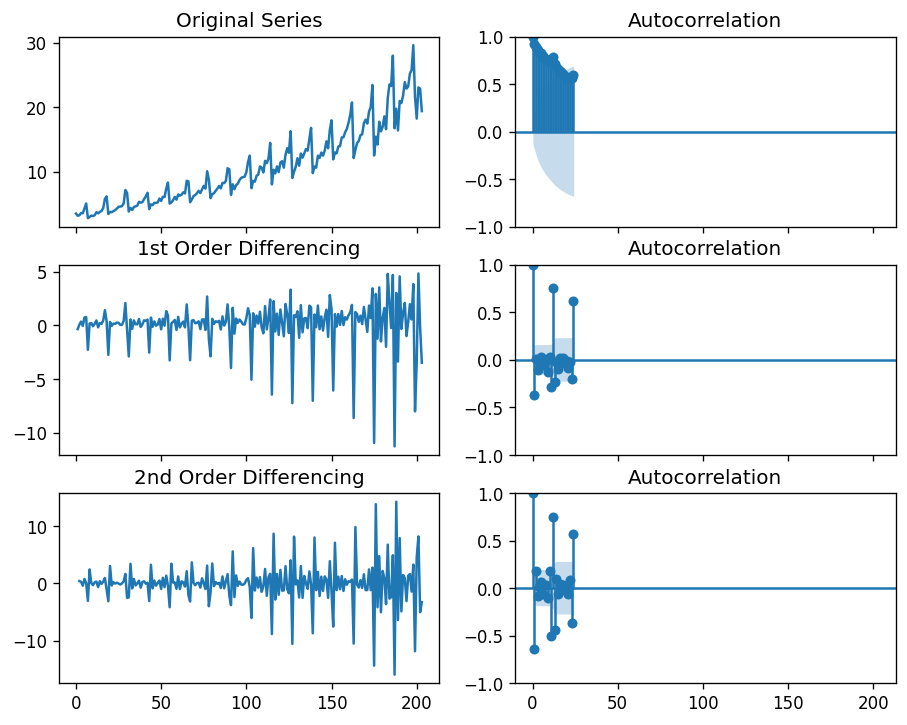

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

> For the above data, we can see that the time series reaches stationarity with two orders of differencing.

# 6. How to find the order of the AR term (p)

We will find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.
* **Partial autocorrelation** can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. This way, we will know if that lag is needed in the AR term or not.
* Partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y.
  $𝑌_𝑡=𝛼_0+𝛼_{1}𝑌_{𝑡−1}+𝛼_{2}𝑌_{𝑡−2}+𝛼_{3}𝑌_{𝑡−3}$
* $Y_t$ is the current series and $𝑌_{𝑡−1}$ is the lag 1 of Y, then the partial autocorrelation of lag 3 ($Y_{t-3}$) is the coefficient  𝛼3  of $Y_{t-3}$ in the above equation.

Now, we should find the number of AR terms. Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

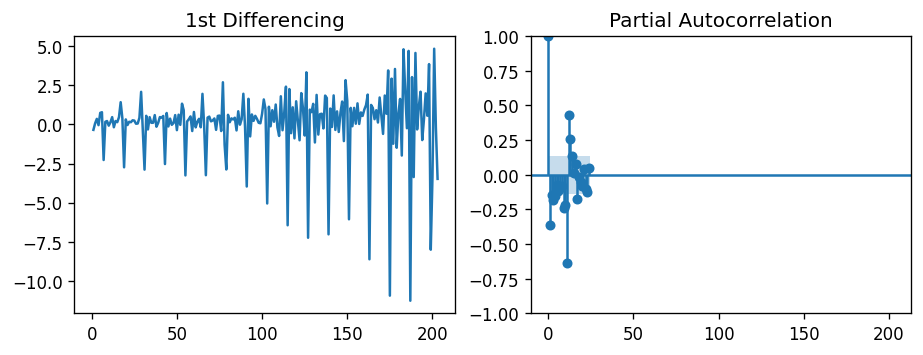

In [6]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

We can see that the PACF lag 1 is quite significant since it is well above the significance line. So, we will fix the value of p as 1.

# 7. How to find the order of the MA term (q)

We will look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

Let’s see the autocorrelation plot of the differenced series.

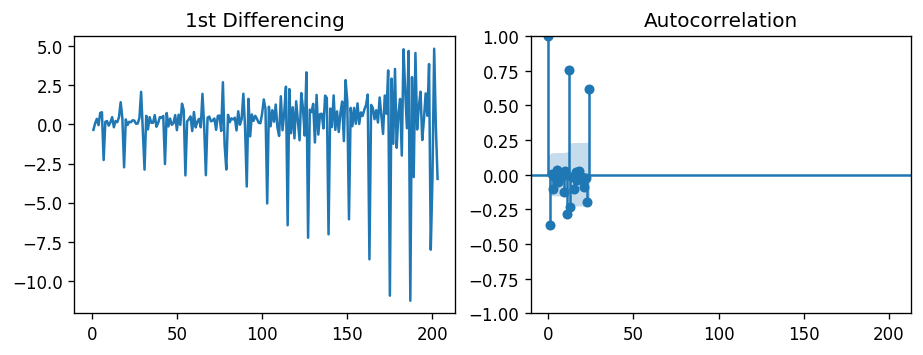

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

We can see that couple of lags are well above the significance line. So, we will fix q as 2. If there is any doubt, we will go with the simpler model that sufficiently explains the Y.

# 8. How to handle if a time series is slightly under or over differenced

* It may happen that the time series is slightly under differenced. Differencing it one more time makes it slightly over-differenced.
* f the series is slightly under differenced, adding one or more additional AR terms usually makes it up. Likewise, if it is slightly over-differenced, we will try adding an additional MA term.

# 9. How to build the ARIMA Model 

Now, we have determined the values of p, d and q. We have everything needed to fit the ARIMA model. We will use the ARIMA() implementation in the statsmodels package.

In [8]:
from statsmodels.tsa.arima.model import ARIMA 

# Define the ARIMA model parameters (p, d, q)
p = 1  # Autoregressive (AR) order
d = 1  # Integrated (I) order (no differencing)
q = 2  # Moving Average (MA) order

# Fit ARIMA model to the data
arima_model = ARIMA(df.value, order=(p, d, q))
arima_result = arima_model.fit()

# Summary of the ARIMA model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -424.570
Date:                Wed, 28 Feb 2024   AIC                            857.140
Time:                        15:24:56   BIC                            870.393
Sample:                             0   HQIC                           862.502
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4178      0.356      1.174      0.240      -0.280       1.115
ma.L1         -0.9546      0.377     -2.531      0.011      -1.694      -0.215
ma.L2          0.0969      0.272      0.356      0.7

* The model summary provides lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

* The coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

So, we will rebuild the model without the MA2 term.

# 10. Find the optimal ARIMA model using Out-of-Time Cross validation

In Out-of-Time cross-validation, we move backwards in time and forecast into the future to as many steps we took back. Then we compare the forecast against the actuals.

To do so, we will create the training and testing dataset by splitting the time series into 2 contiguous parts in a reasonable proportion based on time frequency of series.

In [9]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]
test = df.value[85:]

Now, we will build the ARIMA model on training dataset, forecast and plot it.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fit_model = model.fit()

# Forecast
# fc, se, conf = fit_model.forecast(119, alpha=0.05)  # 95% conf
# Forecast next 119 steps
forecast = fit_model.forecast(steps=119)


# # Make as pandas series
# fc_series = pd.Series(forecast, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

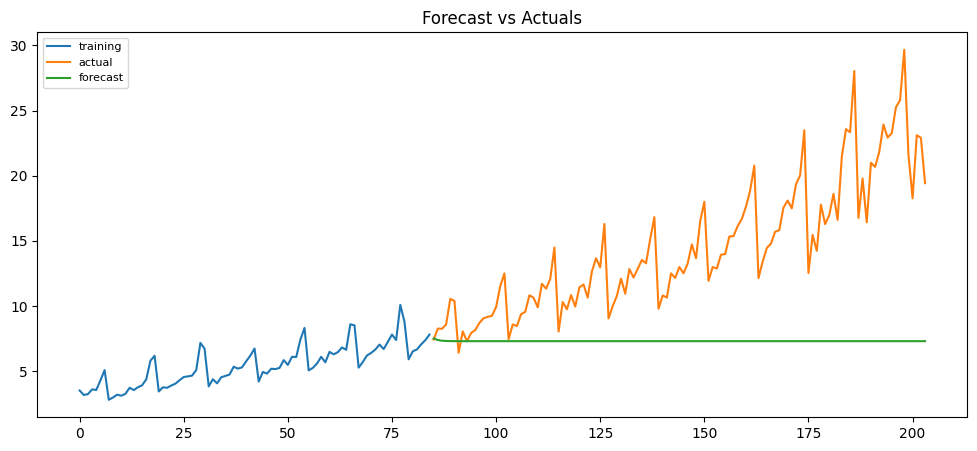

In [36]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(forecast, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

From the above chart, the ARIMA(1,1,1) model seems to predict a correct forecast. The actual observed values lie within the 95% confidence band.

But, we can see that the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve.

So, in this case, we should increase the order of differencing to two (d=2) and iteratively increase p and q up to 5 to see which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

While doing this, I keep an eye on the P values of the AR and MA terms in the model summary. They should be as close to zero, ideally, less than 0.05.

In [40]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc_series = fitted.forecast(119)  # 95% conf

# Make as pandas series
# fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -116.886
Date:                Thu, 29 Feb 2024   AIC                            243.771
Time:                        06:08:27   BIC                            255.865
Sample:                             0   HQIC                           248.630
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2204      0.194     -1.139      0.255      -0.600       0.159
ar.L2         -0.3437      0.141     -2.445      0.014      -0.619      -0.068
ar.L3         -0.0936      0.252     -0.371      0.7

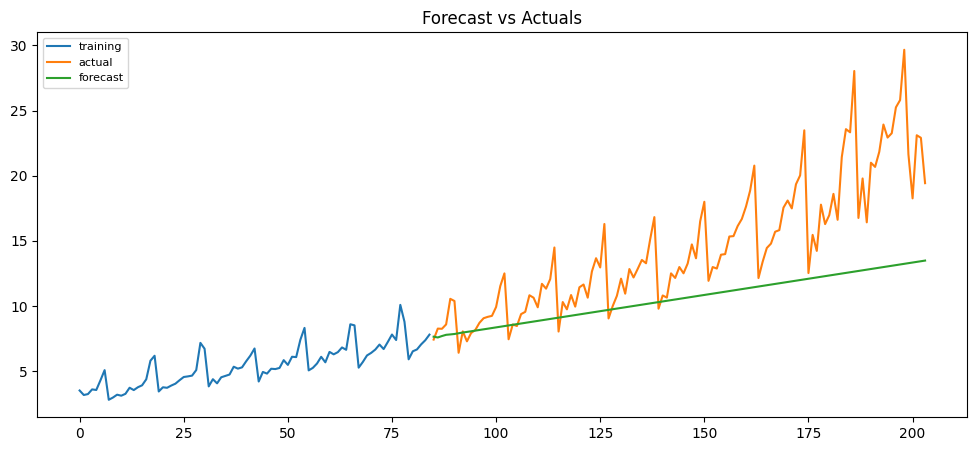

In [42]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The AIC has reduced from 857.140 to 243.771, which is good. Mostly, the p-values of the X terms are less than < 0.05, which is great. So overall this model is much better

# 11. Accuracy Metrics for Time Series Forecast

The commonly used accuracy metrics to judge forecasts are:

1. Mean Absolute Percentage Error (MAPE)
1. Mean Error (ME)
1. Mean Absolute Error (MAE)
1. Mean Percentage Error (MPE)
1. Root Mean Squared Error (RMSE)
1. Lag 1 Autocorrelation of Error (ACF1)
1. Correlation between the Actual and the Forecast (corr)
1. Min-Max Error (minmax)

Typically, we will use three accuracy metrices:-

1. MAPE
1. Correlation and
1. Min-Max Error

can be used. The above three are percentage errors that vary between 0 and 1. That way, we can judge how good is the forecast irrespective of the scale of the series.

In [61]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast, 
                              actual]))
    maxs = np.amax(np.hstack([forecast, 
                              actual]))
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc_series.values, test.values)

{'mape': 0.23266643225079922,
 'me': -3.8806775448918445,
 'mae': 3.9817130589682073,
 'mpe': -0.21930566045928984,
 'rmse': 5.307177543825796,
 'acf1': 0.6960295302416336,
 'corr': 0.8736884146373557,
 'minmax': 0.7835342154666878}

Around 23.22% MAPE implies the model is about 76.78% accurate in predicting the next 15 observations. Now we know how to build an ARIMA model manually. But, we should also know how to automate the best model selection process. So, we will discuss it next.

# 12. Auto Arima Forecasting

In Python, the pmdarima package provides auto_arima() function which can be used to automate the process of ARIMA Forecasting in Python.

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

We need to install the pmdarima package first.

In [62]:
!pip install pmdarima

In [63]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=874.416, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1602.665, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=913.571, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1392.713, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=865.809, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=867.147, Time=0.20 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=871.437, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=868.483, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=858.292, Time=0.26 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=859.374, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=860.832, Time=0.38 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit 

# 13. How to interpret the residual plots in ARIMA model

Let’s review the residual plots using stepwise_fit.

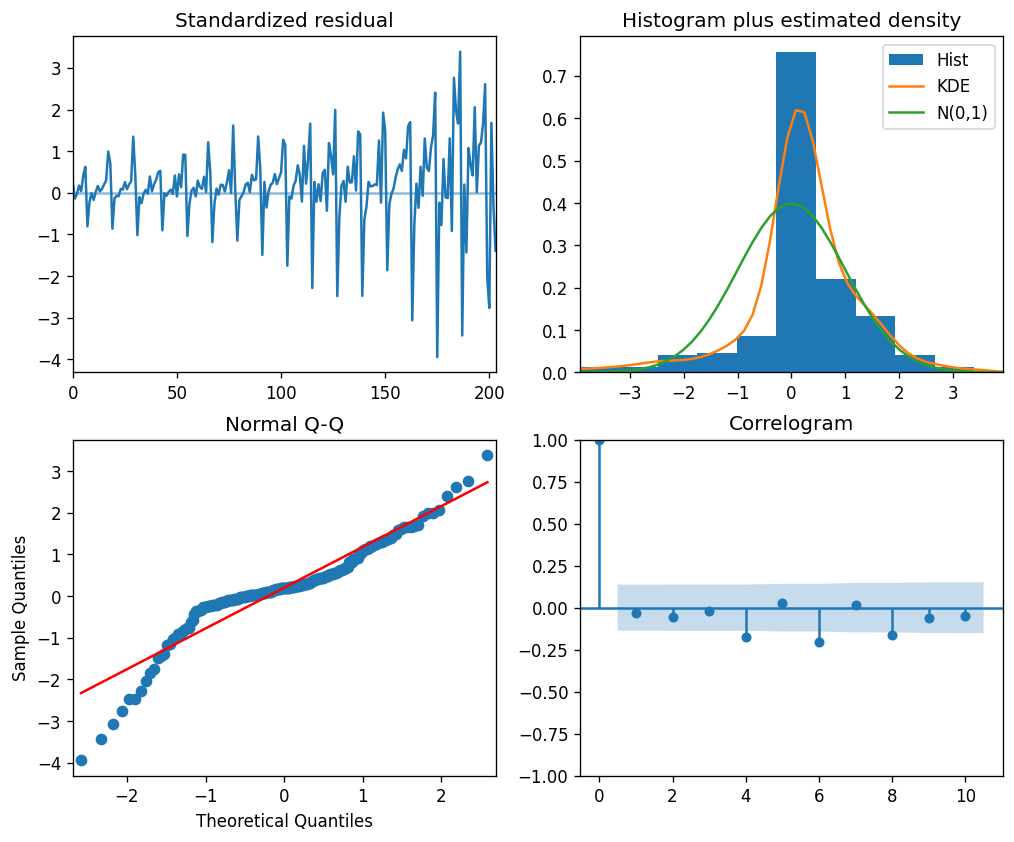

In [64]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

## Interpretation of plots in plot diagnostics

**Standardized residual**: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

**Histogram**: The density plot suggest normal distribution with mean slighlty shifted towards right.

**Theoretical Quantiles**: Mostly the dots fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

**Correlogram**: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model. So we will need to look for more X’s (predictors) to the model.

Overall, the model seems to be a good fit. So, let's use it to forecast.

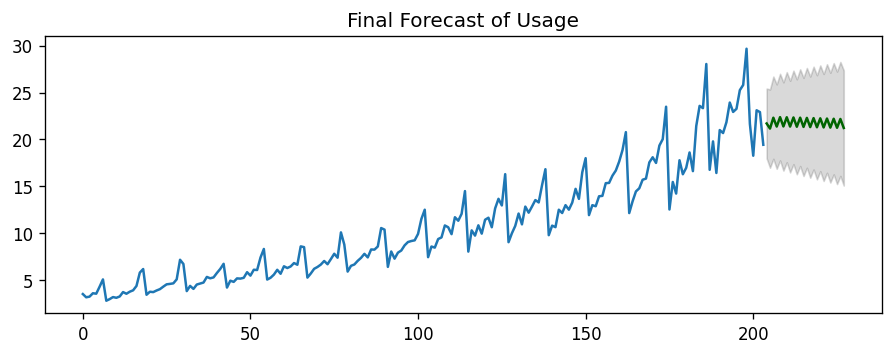

In [65]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value) + n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

# 14. SARIMA model in python 

The plain ARIMA model has a problem. It does not support seasonality.
If the time series has defined seasonality, then we should go for **Seasonal ARIMA model** (in short SARIMA) which uses seasonal differencing.

Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, we subtract the value from `previous season`.

So, the model will be represented as **SARIMA(p,d,q)x(P,D,Q)**, where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series. If the model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.
We should set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. We should try to keep only either SAR or SMA terms if the model has seasonal components.

Now, we will build a SARIMA model on the time series dataset.

But, first import the dataset

In [66]:
data = pd.read_csv('data/dataset.txt', parse_dates=['date'], index_col='date')

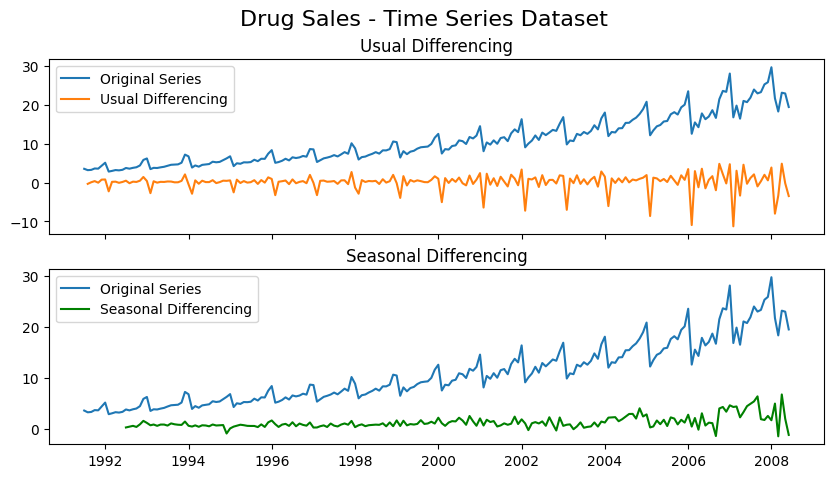

In [67]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

We can see that, the seasonal spikes are intact after applying usual differencing (lag 1). Whereas, it is rectified after seasonal differencing.

Now, let’s build the SARIMA model using pmdarima‘s auto_arima(). To do so, we need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1.

In [68]:
# !pip3 install pyramid-arima (already done)
import pmdarima as pm

In [69]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=0.69 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.16 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=1.80 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=0.63 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.601, Time=2.43 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.17 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=0.64 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.19 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(1, 0, 3)x(1, 1, [1, 2], 12)   Log Likelihood                -251.643
Date:                                 Thu, 29 Feb 2024   AIC                            519.286
Time:                                         08:11:00   BIC                            545.345
Sample:                                     07-01-1991   HQIC                           529.840
                                          - 06-01-2008                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9955      0.007    150.219      0.000       0.982       1.008
ma.L1         -1.0077      0.058    -17.476      0.000      -1.121      -0.895
ma.L2          0.4886      0.078      6.298      0.000       0.337       0.641
ma.L3         -0.2511      0.065     -3.893      0.000      -0.378      -0.125
ar.S.L12       0.8470      0.147      5.752      0.000       0.558       1.136
ma.S.L12      -1.6042      0.171     -9.367      0.000      -1.940      -1.269
ma.S.L24       0.7793      0.109      7.166      0.000       0.566       0.992
sigma2         0.7190      0.066     10.913      0.000       0.590       0.848
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               228.25
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              14.55   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model has estimated the AIC and the P values of the coefficients look significant. Let’s look at the residual diagnostics plot.

The best model SARIMAX(3, 0, 0)x(0, 1, 1, 12) has an AIC of 528.6 and the P Values are significant.

Let’s forecast for the next 24 months.

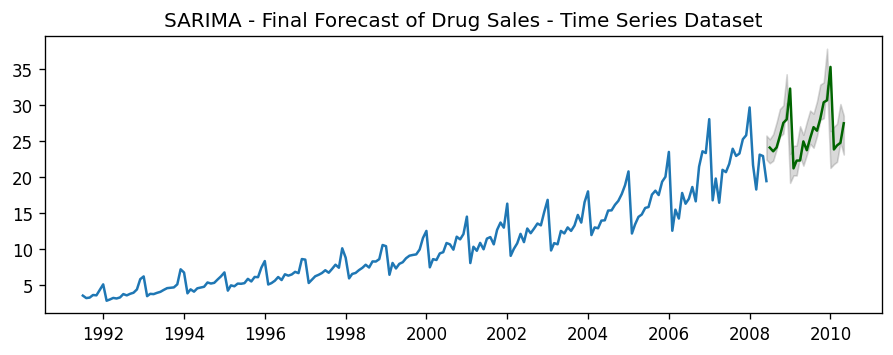

In [70]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

There you have a nice forecast that captures the expected seasonal demand pattern.

# 15. SARIMAX model with exogeneous variables

Now, we will force an external predictor, also called, exogenous variable into the model. This model is called the SARIMAX model. The only requirement to use an exogenous variable is we should know the value of the variable during the forecast period as well.

I want to see how the model looks if we force the recent seasonality pattern into the training and forecast. The seasonal index is a good exogenous variable because it repeats every frequency cycle, 12 months in this case.

So, we will always know what values the seasonal index will hold for the future forecasts.

Let’s compute the seasonal index so that it can be forced as a (exogenous) predictor to the SARIMAX model.

In [71]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(
    data['value'][-36:],   # 3 years
    model='multiplicative', 
    extrapolate_trend='freq'
)

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index

In [72]:
df.head()

,value,month,seasonal_index
date,,,
1991-07-01,3.526591,7,0.970490
1991-08-01,3.180891,8,1.050900
1991-09-01,3.252221,9,0.998881
1991-10-01,3.611003,10,1.059657
1991-11-01,3.565869,11,1.146141


The exogenous variable (seasonal index) is ready. Let’s build the SARIMAX model.

In [73]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=0.72 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.16 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=1.84 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=0.64 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.601, Time=2.40 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.16 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=0.60 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.18 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(1, 0, 3)x(1, 1, [1, 2], 12)   Log Likelihood                -251.643
Date:                                 Thu, 29 Feb 2024   AIC                            519.286
Time:                                         08:19:00   BIC                            545.345
Sample:                                     07-01-1991   HQIC                           529.840
                                          - 06-01-2008                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9955      0.007    150.219      0.000       0.982       1.008
ma.L1         -1.0077      0.058    -17.476      0.000      -1.121      -0.895
ma.L2          0.4886      0.078      6.298      0.000       0.337       0.641
ma.L3         -0.2511      0.065     -3.893      0.000      -0.378      -0.125
ar.S.L12       0.8470      0.147      5.752      0.000       0.558       1.136
ma.S.L12      -1.6042      0.171     -9.367      0.000      -1.940      -1.269
ma.S.L24       0.7793      0.109      7.166      0.000       0.566       0.992
sigma2         0.7190      0.066     10.913      0.000       0.590       0.848
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               228.25
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              14.55   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now, we have the model with the exogenous term.

Let’s forecast into the next 24 months. For this, you need the value of the seasonal index for the next 24 months.

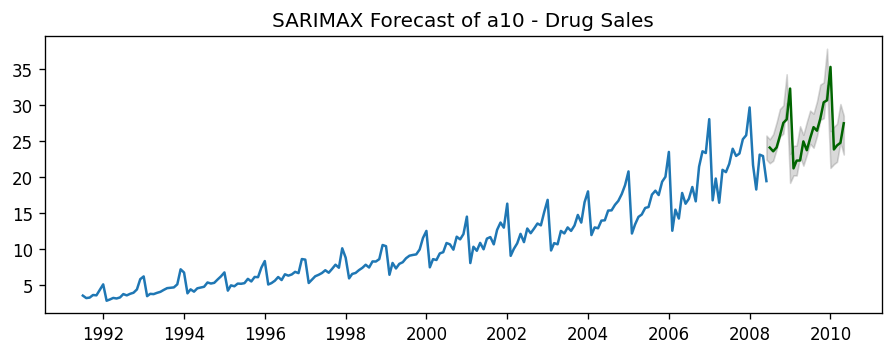

In [79]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(
    n_periods=n_periods, 
    exogenous=np.tile(seasonal_index.values, 2).reshape(-1,1), 
    return_conf_int=True
)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()

# 16. Practice Exercises

In the AirPassengers dataset, go back 12 months in time and build the SARIMA forecast for the next 12 months.

1. Is the series stationary? If not what sort of differencing is required?
1. What is the order of your best model?
1. What is the AIC of your model?
1. What is the MAPE achieved in OOT cross-validation?
1. What is the order of the best model predicted by auto_arima() method?